In [1]:
import json

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets.folder import ImageFolder

from data import *
from utils import Trainer
from models import AlexNet, VanillaCNN
from resnet import *

import matplotlib.pyplot as plt

C:\Users\brock\anaconda3\envs\dl_project\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def acc_plot(ax, train, val, lr, wd):
    ax.plot(train, label='train')
    ax.plot(val, label='val')
    ax.legend()
    ax.set_ylim(bottom=0, top=10)
    ax.set_title(f'LR: {lr}, WD: {wd}')
    
def loss_plot(ax, train, val, lr, wd):
    ax.plot(train, label='train')
    ax.plot(val, label='val')
    ax.legend()
    ax.set_ylim(bottom=2, top=6)
    ax.set_title(f'LR: {lr}, WD: {wd}')

# Dataset Creation

In [3]:
# Define transformations
rescale = Rescale(225)
random_crop = RandomCrop(224)
random_flip = RandomFlip()
random_noise = RandomNoise()
to_tensor = ToTensor()
train_transform = transforms.Compose([rescale, random_crop, to_tensor])
val_transform = transforms.Compose([rescale, random_crop, to_tensor])
transforms = (train_transform, val_transform)

# Define dataset hyperparameters
val_split = 0.25
batch_size = 128

# Define dataset with transformations
dataset = ImageFolderDataSet(root='./data/train', transforms=transforms, batch_size=batch_size, val_split=val_split)

# Define Model and Trainer

In [20]:
alpha_list = [0.0003, 0.0004]
weight_decay = 0
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

results = {}
i = 0
for alpha in alpha_list:
        
    print(f'Running Config {i+1}: Alpha = {alpha}')

    results[i] = {}

    results[i]['alpha'] = alpha

    model = ResNet18(3, ResBlock, outputs=120)

    trainer = Trainer(model, alpha, weight_decay)
    trainer.train(10, dataset.train_loader, dataset.val_loader, device)

    results[i]['train_loss'] = trainer.train_loss
    results[i]['val_loss'] = trainer.val_loss
    results[i]['train_acc'] = trainer.train_acc
    results[i]['val_acc'] = trainer.val_acc

    i += 1
    print()

file_name = './experiments/exp_011_results.json'
with open(file_name, 'w') as file:
    json.dump(results, file)

Running Config 1: Alpha = 0.0003
-----------------------------------
Epoch 1
-----------------------------------
Training: loss = 4.6372 | accuracy = 3.04
Validate: loss = 4.4406 | accuracy = 4.23
-----------------------------------
Epoch 2
-----------------------------------
Training: loss = 4.2969 | accuracy = 6.09
Validate: loss = 4.2663 | accuracy = 5.32
-----------------------------------
Epoch 3
-----------------------------------
Training: loss = 4.0319 | accuracy = 8.86
Validate: loss = 4.0419 | accuracy = 9.20
-----------------------------------
Epoch 4
-----------------------------------
Training: loss = 3.7875 | accuracy = 11.91
Validate: loss = 3.8682 | accuracy = 10.96
-----------------------------------
Epoch 5
-----------------------------------
Training: loss = 3.5747 | accuracy = 14.73
Validate: loss = 3.7447 | accuracy = 12.56
-----------------------------------
Epoch 6
-----------------------------------
Training: loss = 3.3661 | accuracy = 19.11
Validate: loss = 3.6

In [24]:
#results[2] = results[1]
#results[1] = results[0]

file_name = './experiments/exp_010_results.json'
with open(file_name, 'r') as file:
    temp_results = json.load(file)

results[0] = temp_results['0']
results[3] = temp_results['1']

In [25]:
print(results.keys())

dict_keys([0, 1, 2, 3])


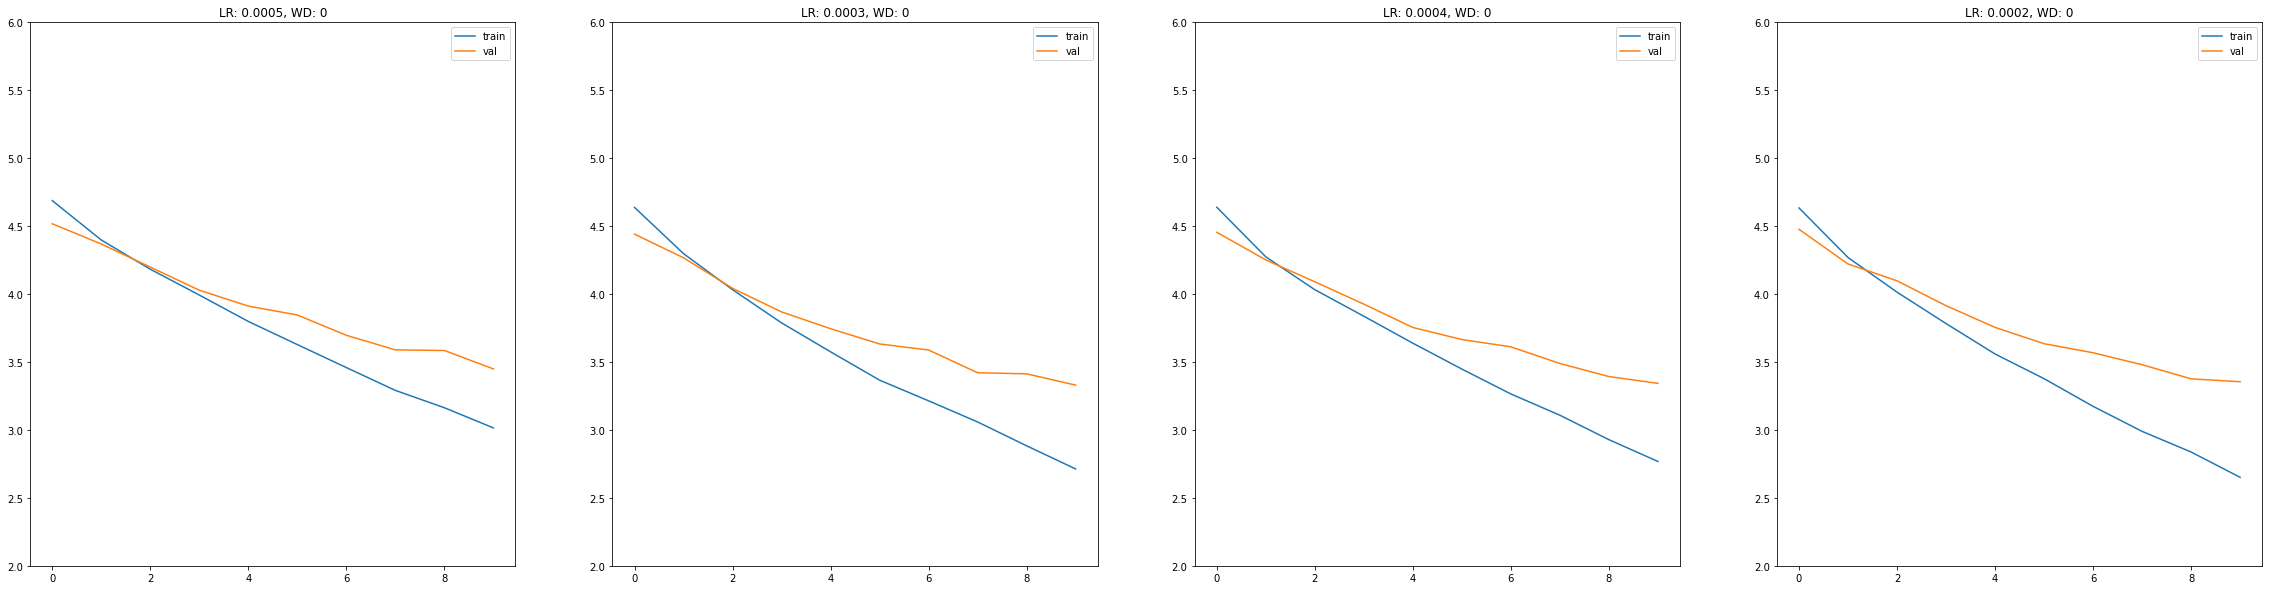

In [26]:
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(40)

config_keys = list(results.keys())
ax_dic = {}
i = 0
for r in range(1):
    for c in range(4):
        ax_dic[i] = plt.subplot2grid((1,4), (r,c))
        train_acc = results[config_keys[i]]['train_loss']
        val_acc = results[config_keys[i]]['val_loss']
        lr = results[config_keys[i]]['alpha']
        loss_plot(ax_dic[i], train_acc, val_acc, lr, 0)
        i += 1

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = ResNet18(3, ResBlock, outputs=120)

alpha = 0.0002
trainer = Trainer(model, alpha, weight_decay)
trainer.train(30, dataset.train_loader, dataset.val_loader, device)

-----------------------------------
Epoch 1
-----------------------------------
Training: loss = 4.6536 | accuracy = 2.73
Validate: loss = 4.4510 | accuracy = 4.85
-----------------------------------
Epoch 2
-----------------------------------
Training: loss = 4.2526 | accuracy = 5.66
Validate: loss = 4.2201 | accuracy = 6.77
-----------------------------------
Epoch 3
-----------------------------------
Training: loss = 3.9778 | accuracy = 9.60
Validate: loss = 4.0361 | accuracy = 8.10
-----------------------------------
Epoch 4
-----------------------------------
Training: loss = 3.7351 | accuracy = 13.46
Validate: loss = 3.8461 | accuracy = 11.31
-----------------------------------
Epoch 5
-----------------------------------
Training: loss = 3.5137 | accuracy = 16.73
Validate: loss = 3.7806 | accuracy = 12.13
-----------------------------------
Epoch 6
-----------------------------------
Training: loss = 3.3692 | accuracy = 19.25
Validate: loss = 3.6705 | accuracy = 13.66
----------